# Построение ассоциативных правил для датасета

### Установим библиотеку mlxtend и загрузим необходимые данные

In [1]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 704.2 kB/s eta 0:00:00


## Подгрузим необходимые библиотеки и данные

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

basket = pd.read_csv("dataset.csv", names=['Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6', 'Item_7', 
                                           'Item_8', 'Item_9', 'Item_10', 'Item_11', 'Item_12', 'Item_13', 'Item_14'])
display(basket.head(10))

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
3,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs
5,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,butter,cereals,bagels,paper towels,shampoo
6,paper towels,tortillas,vegetables,milk,ice cream,juice,dishwashing liquid/detergent,soap,sandwich bags,pasta,ketchup,all- purpose,yogurt,mixes
7,juice,paper towels,waffles,soda,cheeses,poultry,toilet paper,vegetables,,NaN,NaN,NaN,NaN,NaN
8,poultry,coffee/tea,coffee/tea,dishwashing liquid/detergent,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,coffee/tea,toilet paper,pork,flour,milk,soda,dishwashing liquid/detergent,eggs,tortillas,tortillas,vegetables,fruits,sugar,soap


In [78]:
basket.shape

(1499, 14)

## Уберем пропущенные данные и сгруппируем данные по столбцам в один список

In [85]:
basket = basket.stack().groupby(level=0).apply(list).apply(lambda x: [i for i in x if str(i) != 'nan' and i != ' ']).reset_index(drop=True)

In [86]:
basket.to_list()

[[' pork',
  ' sandwich bags',
  ' lunch meat',
  ' all- purpose',
  ' flour',
  ' soda',
  ' butter',
  ' vegetables',
  ' beef',
  ' aluminum foil',
  ' all- purpose',
  ' dinner rolls',
  ' shampoo',
  ' all- purpose'],
 [' shampoo',
  ' hand soap',
  ' waffles',
  ' vegetables',
  ' cheeses',
  ' mixes',
  ' milk',
  ' sandwich bags',
  ' laundry detergent',
  ' dishwashing liquid/detergent',
  ' waffles',
  ' individual meals',
  ' hand soap',
  ' vegetables'],
 [' pork',
  ' soap',
  ' ice cream',
  ' toilet paper',
  ' dinner rolls',
  ' hand soap',
  ' spaghetti sauce',
  ' milk',
  ' ketchup',
  ' sandwich loaves',
  ' poultry',
  ' toilet paper',
  ' ice cream',
  ' ketchup'],
 [' juice', ' lunch meat', ' soda', ' toilet paper', ' all- purpose'],
 [' pasta',
  ' tortillas',
  ' mixes',
  ' hand soap',
  ' toilet paper',
  ' vegetables',
  ' vegetables',
  ' paper towels',
  ' vegetables',
  ' flour',
  ' vegetables',
  ' pork',
  ' poultry',
  ' eggs'],
 [' toilet paper',
  '

In [88]:
basket.shape

(1499,)

## После этого с помощью TransactionEncoder мы закодируем транзакции в формат, подходящий для функции Apriori.

In [89]:
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


In [100]:
transactions

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,True,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1495,False,False,False,False,False,True,True,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1496,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,True,False,True,True,False,False
1497,True,False,False,True,False,False,True,False,False,False,...,False,True,False,True,True,True,False,False,True,True


In [91]:
print(transactions.shape)

(1499, 38)


### Apriori и правила ассоциаций
Алгоритм Apriori будет использоваться для генерации частых наборов элементов. Мы зададим минимальную поддержку в размере 6 из общего числа транзакций. Генерируются правила ассоциаций, и мы отфильтровываем значения Lift > 1,5.

In [114]:
frequent_itemsets = apriori(transactions, min_support= 30/len(basket), use_colnames=True, max_len = 3)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.3)
display(rules.head(20))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( all- purpose, coffee/tea)",( bagels),0.066044,0.278185,0.025350,0.383838,1.379793,0.006978,1.171470,0.294718
1,( bagels),"( all- purpose, coffee/tea)",0.278185,0.066044,0.025350,0.091127,1.379793,0.006978,1.027598,0.381336
2,"( all- purpose, bagels)",( eggs),0.075384,0.268846,0.029353,0.389381,1.448341,0.009086,1.197397,0.334793
3,"( all- purpose, eggs)",( bagels),0.071381,0.278185,0.029353,0.411215,1.478204,0.009496,1.225939,0.348371
4,"( bagels, eggs)",( all- purpose),0.080053,0.263509,0.029353,0.366667,1.391477,0.008258,1.162881,0.305821
5,( all- purpose),"( bagels, eggs)",0.263509,0.080053,0.029353,0.111392,1.391477,0.008258,1.035268,0.381999
6,( bagels),"( all- purpose, eggs)",0.278185,0.071381,0.029353,0.105516,1.478204,0.009496,1.038161,0.448181
7,( eggs),"( all- purpose, bagels)",0.268846,0.075384,0.029353,0.109181,1.448341,0.009086,1.037940,0.423378
8,"( fruits, bagels)",( all- purpose),0.076718,0.263509,0.026684,0.347826,1.319978,0.006469,1.129286,0.262554
9,"( all- purpose, bagels)",( fruits),0.075384,0.263509,0.026684,0.353982,1.343340,0.006820,1.140048,0.276425


Rules identified:  828


In [115]:
frequent_itemsets

,support,itemsets
0,0.263509,( all- purpose)
1,0.264176,( aluminum foil)
2,0.278185,( bagels)
3,0.262842,( beef)
4,0.261508,( butter)
...,...,...
3295,0.047365,"( toilet paper, vegetables, yogurt)"
3296,0.030020,"( toilet paper, waffles, yogurt)"
3297,0.036024,"( vegetables, tortillas, waffles)"
3298,0.045364,"( vegetables, tortillas, yogurt)"


In [116]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( all- purpose, coffee/tea)",( bagels),0.066044,0.278185,0.025350,0.383838,1.379793,0.006978,1.171470,0.294718
1,( bagels),"( all- purpose, coffee/tea)",0.278185,0.066044,0.025350,0.091127,1.379793,0.006978,1.027598,0.381336
2,"( all- purpose, bagels)",( eggs),0.075384,0.268846,0.029353,0.389381,1.448341,0.009086,1.197397,0.334793
3,"( all- purpose, eggs)",( bagels),0.071381,0.278185,0.029353,0.411215,1.478204,0.009496,1.225939,0.348371
4,"( bagels, eggs)",( all- purpose),0.080053,0.263509,0.029353,0.366667,1.391477,0.008258,1.162881,0.305821
...,...,...,...,...,...,...,...,...,...,...
823,"( toilet paper, yogurt)",( waffles),0.074049,0.278853,0.030020,0.405405,1.453834,0.009371,1.212839,0.337128
824,"( waffles, yogurt)",( toilet paper),0.078052,0.270180,0.030020,0.384615,1.423552,0.008932,1.185957,0.322721
825,( toilet paper),"( waffles, yogurt)",0.270180,0.078052,0.030020,0.111111,1.423552,0.008932,1.037191,0.407678
826,( waffles),"( toilet paper, yogurt)",0.278853,0.074049,0.030020,0.107656,1.453834,0.009371,1.037660,0.432871


<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\User\AppData\Local\Temp\ipykernel_17552\2633165278.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


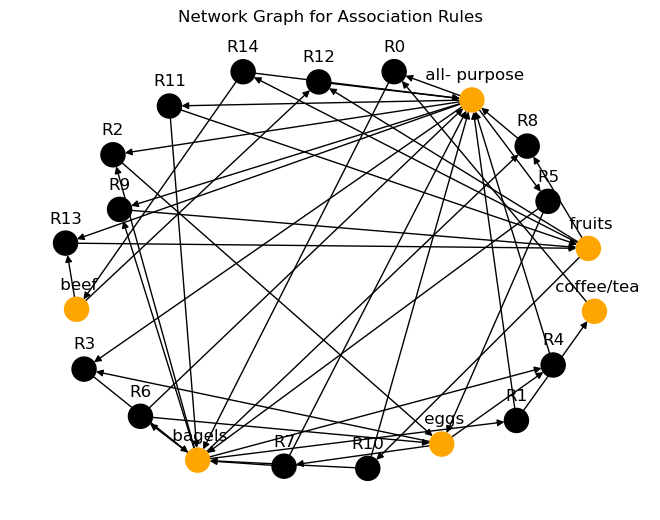

In [117]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()
  
  # Перебор количества правил для отображения
  for i in range(rules_to_show):
    
    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 15)

### Применение алгоритма в бизнесе
Допустим, владельцы магазина закупили слишком много свинины и теперь беспокоятся, что товар пропадет, если его не удастся вовремя распродать. Что еще хуже, рентабельность продаж свинины настолько низка, что они не могут позволить себе промо-скидку, не потеряв при этом большую часть прибыли.

In [120]:
pork_rules = rules[rules['consequents'].astype(str).str.contains('pork')]
pork_rules = pork_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(pork_rules.head(20))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( mixes, beef)",( pork),0.065377,0.250167,0.025350,0.387755,1.549986,0.008995,1.224728,0.379654
1,( juice),"( pork, sandwich loaves)",0.257505,0.060707,0.024016,0.093264,1.536298,0.008384,1.035906,0.470151
2,( sandwich loaves),"( pork, juice)",0.248833,0.064710,0.024016,0.096515,1.491501,0.007914,1.035202,0.438696
3,"( ketchup, beef)",( pork),0.065377,0.250167,0.023349,0.357143,1.427619,0.006994,1.166407,0.320485
4,"( all- purpose, sandwich bags)",( pork),0.064710,0.250167,0.022682,0.350515,1.401127,0.006494,1.154505,0.306096
5,( beef),"( pork, soda)",0.262842,0.069380,0.025350,0.096447,1.390131,0.007114,1.029956,0.380710
6,"( juice, sandwich loaves)",( pork),0.070047,0.250167,0.024016,0.342857,1.370514,0.006493,1.141051,0.290710
7,"( beef, individual meals)",( pork),0.072048,0.250167,0.024683,0.342593,1.369457,0.006659,1.140591,0.290730
8,( beef),"( pork, individual meals)",0.262842,0.068712,0.024683,0.093909,1.366690,0.006623,1.027808,0.363972
9,( beef),"( pork, dinner rolls)",0.262842,0.061374,0.022015,0.083756,1.364682,0.005883,1.024428,0.362512


### Вывод: Например, мы можем установить промо-скидку на говядину, сок, сендвичи и кетчуп. Некоторые ассоциации могут показаться контринтуитивными, но правила гласят, что эти продукты действительно стимулируют продажи свинины.

## Отсортироуем товары по максимальному подъему

In [121]:
rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( juice),"( yogurt, sandwich loaves)",0.257505,0.064043,0.026017,0.101036,1.577639,0.009526,1.041151,0.493123
1,"( yogurt, sandwich loaves)",( juice),0.064043,0.257505,0.026017,0.406250,1.577639,0.009526,1.250518,0.391195
2,"( spaghetti sauce, dishwashing liquid/detergent)",( fruits),0.061374,0.263509,0.025350,0.413043,1.567474,0.009178,1.254762,0.385703
3,( fruits),"( spaghetti sauce, dishwashing liquid/detergent)",0.263509,0.061374,0.025350,0.096203,1.567474,0.009178,1.038535,0.491562
4,"( mixes, beef)",( pork),0.065377,0.250167,0.025350,0.387755,1.549986,0.008995,1.224728,0.379654
5,( pork),"( mixes, beef)",0.250167,0.065377,0.025350,0.101333,1.549986,0.008995,1.040011,0.473216
6,( juice),"( pork, sandwich loaves)",0.257505,0.060707,0.024016,0.093264,1.536298,0.008384,1.035906,0.470151
7,"( pork, sandwich loaves)",( juice),0.060707,0.257505,0.024016,0.395604,1.536298,0.008384,1.228492,0.371646
8,( ketchup),"( mixes, juice)",0.250167,0.071381,0.027352,0.109333,1.531688,0.009494,1.042611,0.462937
9,"( mixes, juice)",( ketchup),0.071381,0.250167,0.027352,0.383178,1.531688,0.009494,1.215639,0.373809
